In [253]:
using Plots
using LaTeXStrings
using DifferentialEquations
using Printf


In [254]:
domain = (0.0, 1.0)
ϵ = 0.1;
ϵ2 = 0.01;

A = 0
B = 1;


In [255]:
function layer1!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    return dv[2] = -(u - du) / ϵ
end


layer1! (generic function with 1 method)

In [256]:
function layer2!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    return dv[2] = -(u - du) / ϵ2
end


layer2! (generic function with 1 method)

In [257]:
function bc!(residual, v, p, t)
    residual[1] = v[begin][1] - A
    return residual[2] = v[end][1] - B
end


bc! (generic function with 1 method)

In [258]:
# Define the problem and solve for the current epsilon
u0 = [A, 0]

bvp1 = BVProblem(layer1!, bc!, u0, domain)
bvp2 = BVProblem(layer2!, bc!, u0, domain)

sol1 = solve(bvp1, MIRK4(), dt = 0.01);
sol2 = solve(bvp2, MIRK4(), dt = 0.01);


In [259]:
x = LinRange(0, 1, 1000)

outer(x, ϵ) = B * exp(1 - x)
inner(x, ϵ) = (A - B * ℯ) * exp(-x / ϵ)
# ucp =
composite(x, ϵ) = outer(x, ϵ) .+ inner(x, ϵ)


composite (generic function with 1 method)

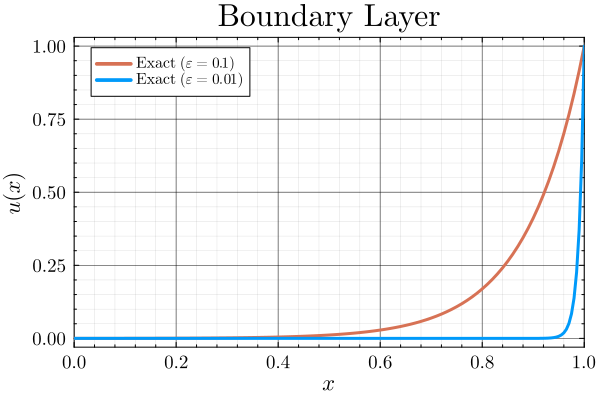

In [260]:
theme(:dao::Symbol)
plt = plot(
    sol1,
    idxs = [1],
    label = "Exact " * L"$(\varepsilon=%$ϵ)$",
    xlabel = L"$x$",
    ylabel = L"$u(x)$",
    title = "Boundary Layer",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    line = (3, :solid),
    right_margin = 2 * Plots.mm
)
plot!(
    plt, sol2,
    idxs = [1],
    label = "Exact " * L"$(\varepsilon=%$ϵ2)$",
    xlabel = L"$x$",
    line = (3, :solid)
)
# savefig(plt, "Aero_HW6_Prob1_exact.pdf")
plt


In [266]:
plot(
    x, composite.(x, ϵ2),
    label = "Composite " * L"$(\varepsilon=%$ϵ2)$",
    line = (3, :dash),
    xlabel = L"$x$",
    ylabel = L"$u(x)$",
    title = "Boundary Layer",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    right_margin = 2 * Plots.mm
)
plot!(
    x, composite.(x, ϵ),
    label = "Composite " * L"$(\varepsilon=%$ϵ)$",
    line = (3, :dash),
)
savefig("Aero_Exam2_Prob3_BL.pdf")


"/home/belster/JuliaFiles/Aero/exam2/Aero_Exam2_Prob3_BL.pdf"